# 非階層clustering

## k-means

In [2]:
#ライブラリ
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = load_iris()

In [3]:
#データの確認
print( iris.data.shape)
print(iris.target_names)
#iris.dataはnumpy型
print(type(iris.data))
print(type(iris.target.data))

#numpy => pd.DataFrame型へ変換
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
#DFの平均、最大、最小、四分位数確認
df_iris.describe()


(150, 4)
['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>
<class 'memoryview'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


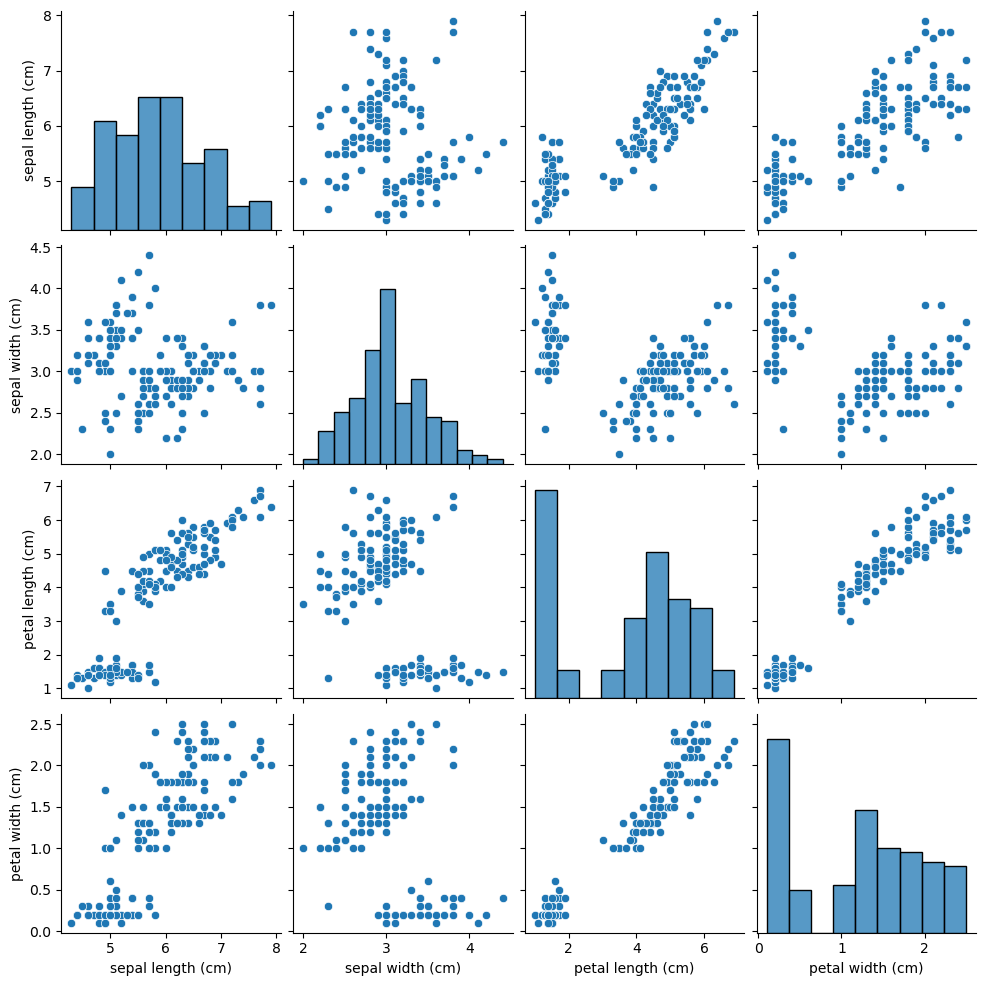

In [4]:
#図として描画
df_temp = df_iris.copy()
#ペアプロットで表示
sns.pairplot(df_temp)


c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
<class 'numpy.ndarray'>
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5      

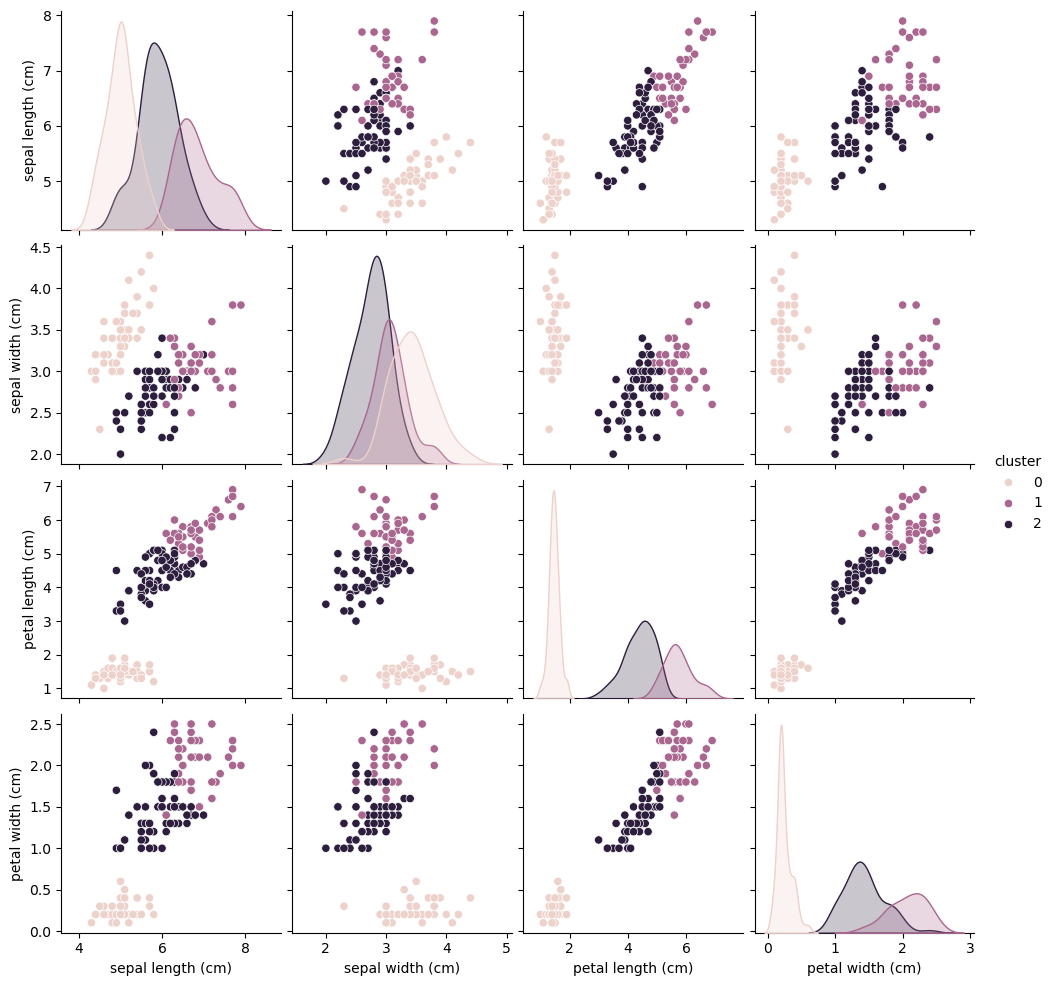

In [5]:
#k-meansによるクラスタリング
model = KMeans(n_clusters=3,  random_state=0, init="random")
cls_data = df_iris.copy()
#クラスタモデル構築
model.fit(cls_data)
#予測とその表示
cluster = model.predict(cls_data)
print(cluster)
print(type(cluster))

#numpy.ndarray型をsnsで表示
#cls_dataのカラム数確認=>4
print(cls_data)
#clusterカラムをcls_dataに追加
cls_data["cluster"] = cluster
#cls_dataのカラム数確認=>5
print(cls_data)
#hueで、色分けするためのカテゴリ指定
sns.pairplot(cls_data, hue="cluster")

,0,1,2,3
0,5.006000,3.428000,1.462000,0.246000
1,6.850000,3.073684,5.742105,2.071053
2,5.901613,2.748387,4.393548,1.433871


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,6.850000,3.073684,5.742105,2.071053
2,5.901613,2.748387,4.393548,1.433871


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'cluster'],
      dtype='object')


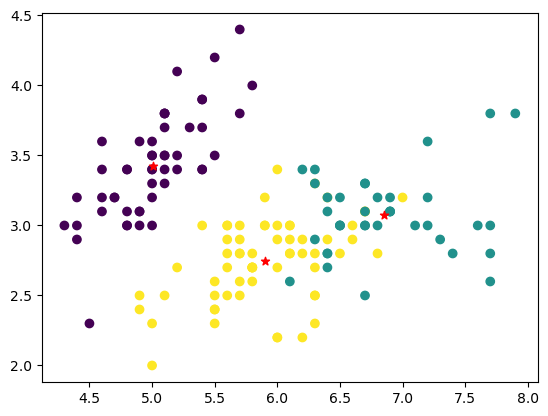

In [6]:
#クラスタの中心を取得
cluster_center = pd.DataFrame(model.cluster_centers_)
display(cluster_center)
#カラム名がないので、cls_dataからコピーする
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)
#クラスタの中心を可視化
#カラム名指定がダルいので、もっかい参照
print(cls_data.columns)
#カラム名コピペ
x = 'sepal length (cm)'
y = 'sepal width (cm)'
#cで色分けするためのクラスタ結果指定
plt.scatter(cls_data[x], cls_data[y], c = cls_data["cluster"])
plt.scatter(cluster_center[x], cluster_center[y], marker='*', color = "red")

In [7]:
#クラスターの平均値の取得
#.round(n)で、少数第n位までに丸められる
cls_mean = cls_data.groupby("cluster").mean().round(2)
#比較してみる
display(cls_mean)
#正解と比較する
#targetからコピペ
print(iris.target_names)
cls_data["target"] = iris.target
#targetカラムをcls_dataに追加
display(cls_data.groupby("target").mean().round(2))
#クラスタ番号になってるので、花の名前に置き換える
#df.loc[条件] => 条件を満たす行を操作できる
cls_data.loc[cls_data["target"]==0, "target"]='setosa'
cls_data.loc[cls_data["target"]==1, "target"]='versicolor'
cls_data.loc[cls_data["target"]==2, "target"]='virginica'
display(cls_data.groupby("target").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.01,3.43,1.46,0.25
1,6.85,3.07,5.74,2.07
2,5.90,2.75,4.39,1.43


['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
0,5.01,3.43,1.46,0.25,0.00
1,5.94,2.77,4.26,1.33,1.96
2,6.59,2.97,5.55,2.03,1.28


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.96
virginica,6.59,2.97,5.55,2.03,1.28


In [8]:
#ARI
from sklearn.metrics import accuracy_score, adjusted_rand_score
ari = adjusted_rand_score(iris.target, cls_data["cluster"])
print(type(ari))
print(ari)
#Accuracy
accuracy = accuracy_score(iris.target, cls_data["cluster"])
print(accuracy)

<class 'float'>
0.7302382722834697
0.44


## k-means++

c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


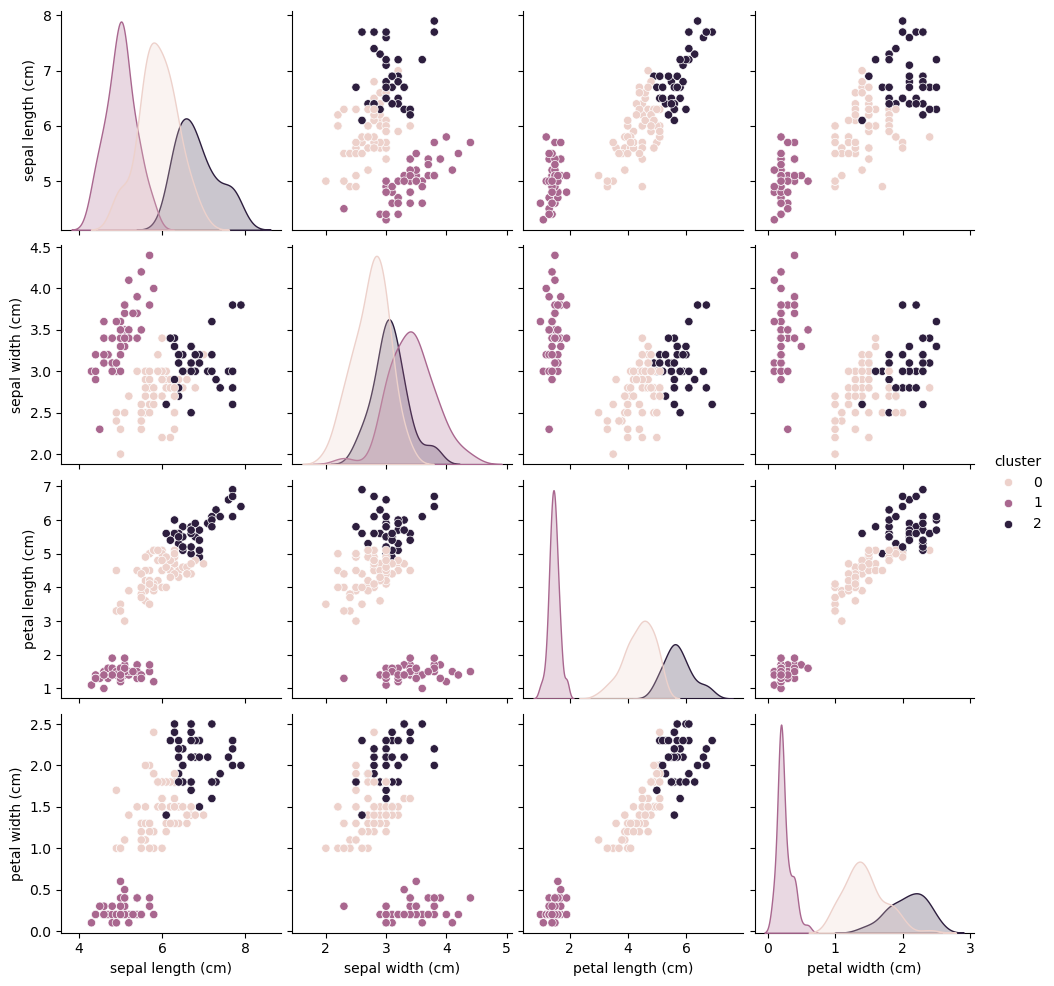

In [9]:
#モデルの型作成
model = KMeans(n_clusters=3, random_state=0, init="k-means++")
#DFデータ作成
cls_data = df_iris.copy()
#モデル構築
model.fit(cls_data)
#クラスタリング
cluster = model.predict(cls_data)
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue="cluster")

In [10]:
#ARIを確認
ari = adjusted_rand_score(iris.target, cls_data['cluster'])
print(ari)


0.7302382722834697


c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5399218294207123


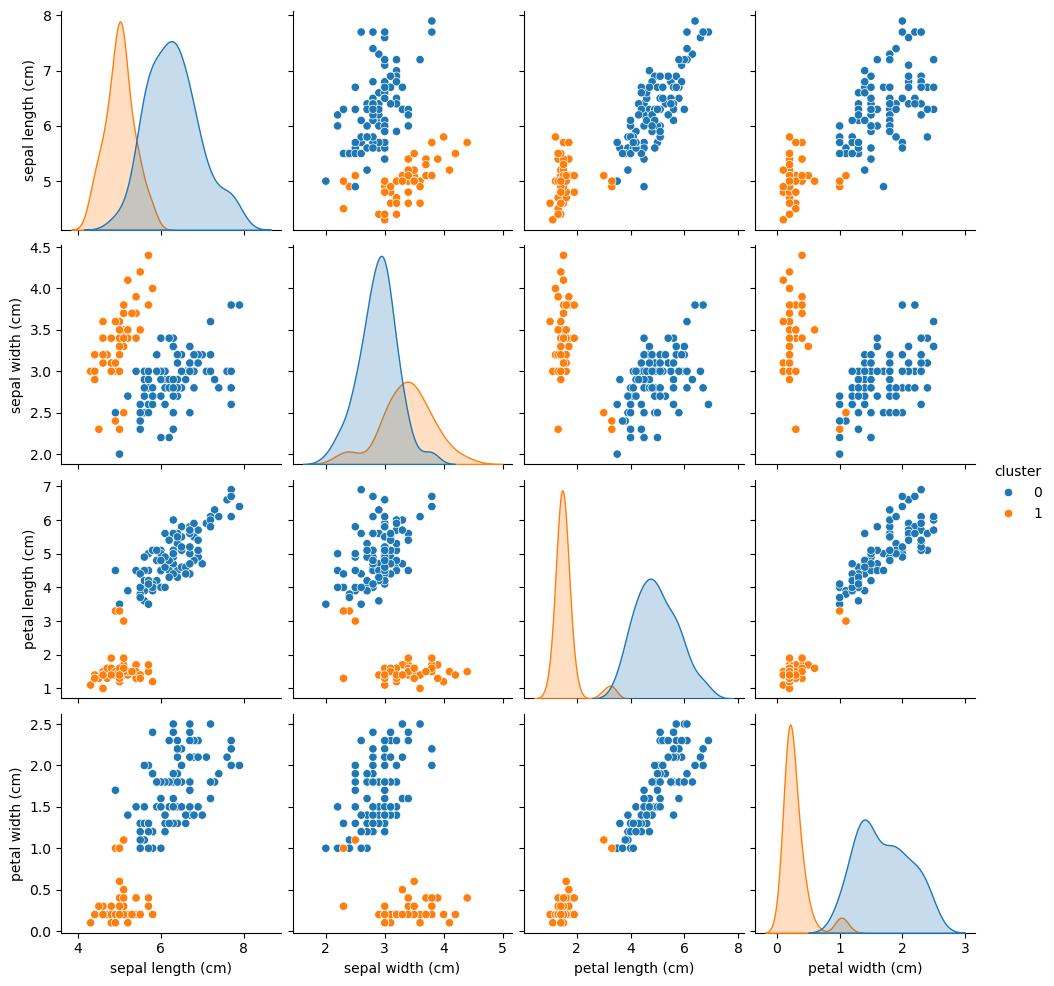

In [11]:
#クラスタ数2でやってみる
model = KMeans(n_clusters=2, init="k-means++")
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue="cluster")

#ARIは？
ari = adjusted_rand_score(iris.target, cls_data["cluster"])
print(ari)

## エルボー法

<function matplotlib.pyplot.show(close=None, block=None)>

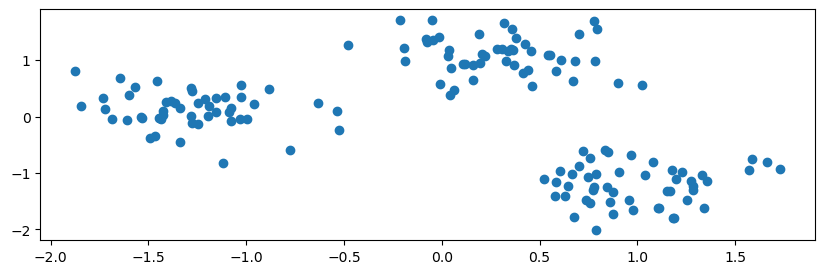

In [12]:
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing
#データ生成
X, y = make_blobs(n_samples=150, #サンプル数
                  n_features=2, #次元数
                  centers=3, #クラスタ数
                  cluster_std=0.5, #クラスタ内の標準偏差
                  shuffle=True, 
                  random_state=0)
#前処理
#集合の各データから平均を引いて標準偏差で割る(標準化)手法定義
sc = preprocessing.StandardScaler()
#標準化+標準偏差、最大最小算出(fit)+データ変換(transform)
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
plt.figure(figsize=(10, 3))
plt.scatter(x, y)
plt.show

c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMe

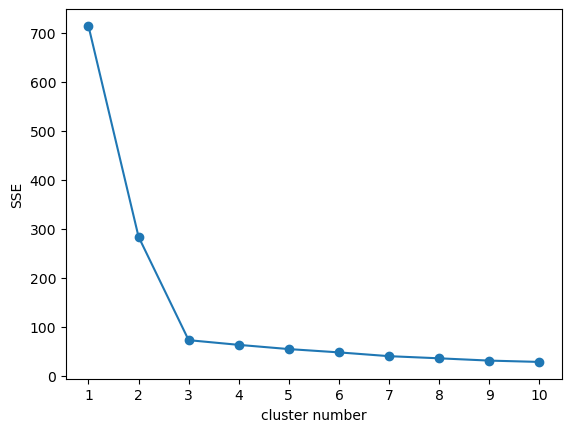

In [13]:
#クラスタリング
distortion = []
#SSE計算
for i in range(1, 11):
    el_model = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=0)
    el_model.fit(X)
    #inertiaは、クラスタ内SSE
    distortion.append(el_model.inertia_)
plt.plot(range(1, 11), distortion, marker = "o")
plt.xticks(range(1, 11))
plt.xlabel("cluster number")
plt.ylabel("SSE")
plt.show()
#急激に変化している点が最適なクラスタ数

## シルエット分析

In [14]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


# 階層clustering

## 距離関数の種類
* Single Linkage: 2クラスタ内で一番近い点同士の距離をクラスタ間距離とする
* Complite Linkage: 2クラスタ内で一番遠い点同士の距離をクラスタ間距離とする
* Average Linkage: 全ての組み合わせのサンプル間距離の平均をクラスター間距離とする
* Ward Linkage: クラスタ重心からクラスタ内の各点の距離の2乗和の合計を最小化する
## 距離の種類
* ユークリッド距離: 2点を結ぶ線分の長さ
* マンハッタン距離: 各座標の距離の総和
* cos類似度: 2つのベクトルの内積を、絶対値で割ったもの

### ウォード法+ユークリッド距離

In [42]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
%matplotlib inline

[[1.4 0.2]
 [1.5 0.2]
 [1.7 0.2]
 [1.6 0.2]
 [1.3 0.3]
 [4.7 1.4]
 [3.5 1. ]
 [4.8 1.8]
 [3.8 1.1]
 [4.4 1.2]
 [6.  2.5]
 [5.1 2. ]
 [5.7 2.3]
 [6.1 1.9]
 [5.6 2.4]]


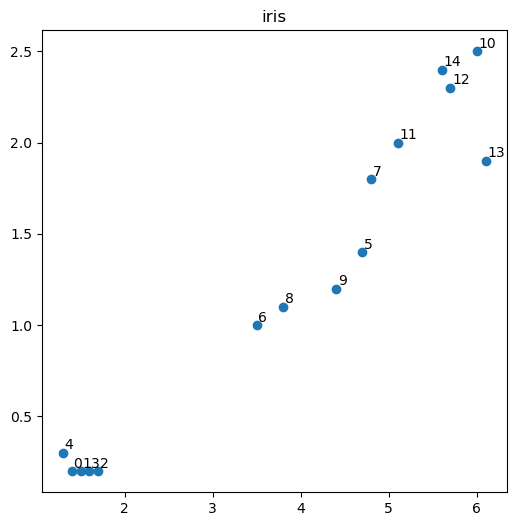

In [56]:
#clumnsの3,4項目目を、10データおきに取得
X = load_iris().data[::10, 2:4]
print(X)
#図のサイズ指定(600px*600px)
fig = plt.figure(figsize=(6, 6))
#タイトル挿入
ax = fig.add_subplot(1, 1, 1, title = "iris")
plt.scatter(X[:, 0], X[:, 1])
#データ番号挿入
#enumerate関数で、行ごとにループ
for i, element in enumerate(X):
    #取得した座標から少し離れたところに番号挿入
    plt.text(element[0] + 0.02, element[1] + 0.02, i)
plt.show()

In [57]:
Z = linkage(X, method="ward", metric="euclidean")
pd.DataFrame(Z)
from scipy.cluster.hierarchy import dendrogram

C:\Users\rikuto\AppData\Local\Temp\ipykernel_3164\1825571771.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


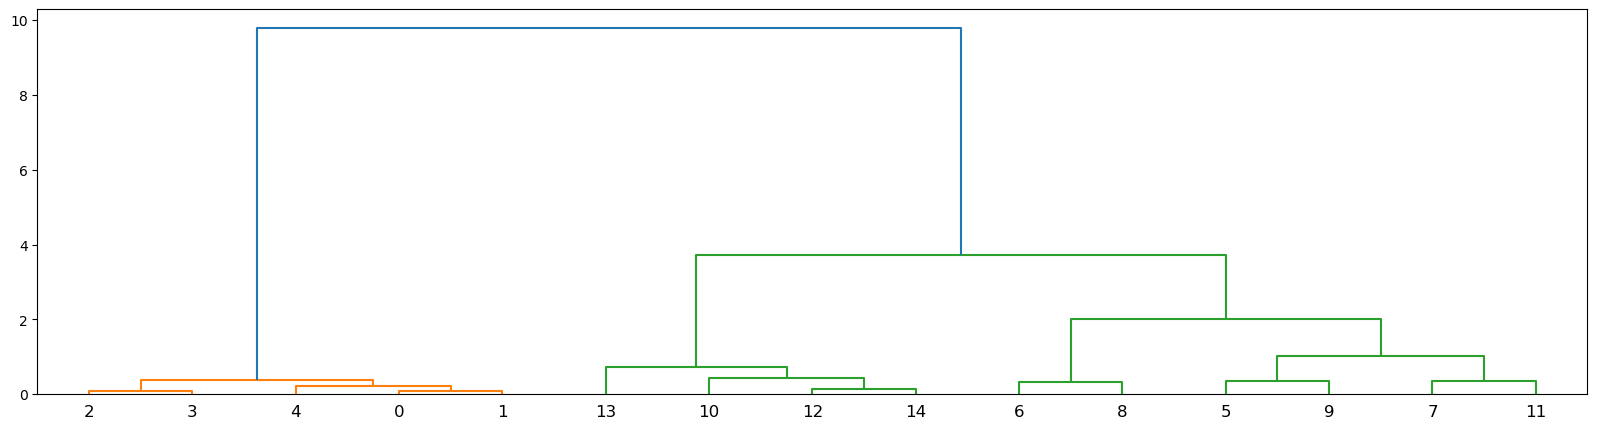

In [58]:
fig2, ax2 = plt.subplots(figsize = (20, 5))
ax2 = dendrogram(Z)
fig2.show()

In [59]:
#クラスタ数指定
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=3, criterion = "maxclust")
for i, c in enumerate(clusters):
    print(i, c)

0 1
1 1
2 1
3 1
4 1
5 3
6 3
7 3
8 3
9 3
10 2
11 3
12 2
13 2
14 2


In [60]:
#閾値で分ける
cluster1 = fcluster(Z, 1.6, criterion="distance")
for i, c in enumerate(cluster1):
    print(i, c)

0 1
1 1
2 1
3 1
4 1
5 4
6 3
7 4
8 3
9 4
10 2
11 4
12 2
13 2
14 2


## ウォード法、最短距離法、群平均法の比較

In [49]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

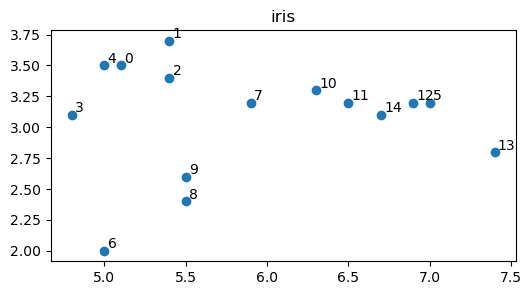

In [64]:
X = load_iris().data[::10]
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1,title = "iris")
plt.scatter(X[:, 0], X[:, 1])
for i, element in enumerate(X):
    plt.text(element[0] + 0.02, element[1] + 0.02, i)
plt.show()

C:\Users\rikuto\AppData\Local\Temp\ipykernel_3164\1324068506.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
C:\Users\rikuto\AppData\Local\Temp\ipykernel_3164\1324068506.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
C:\Users\rikuto\AppData\Local\Temp\ipykernel_3164\1324068506.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


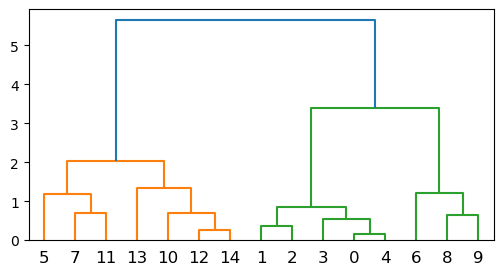

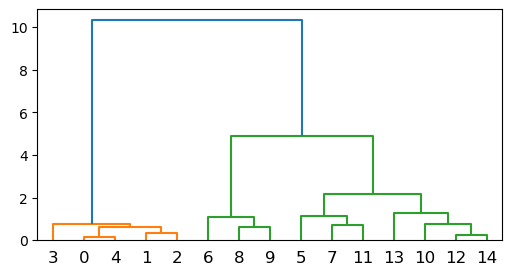

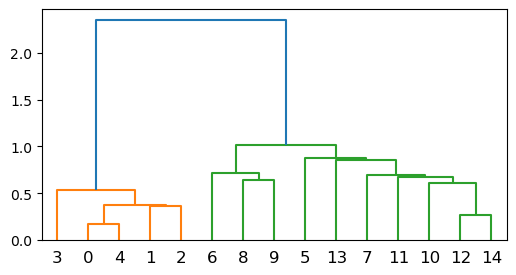

In [76]:
Z = linkage(X, method="complete", metric="euclidean")
fig2, ax2 = plt.subplots(figsize = (6, 3))
ax2 = dendrogram(Z)
fig2.show()

Z = linkage(X, method="ward", metric="euclidean")
fig2, ax2 = plt.subplots(figsize = (6, 3))
ax2 = dendrogram(Z)
fig2.show()

Z = linkage(X, method="single", metric="euclidean")
fig2, ax2 = plt.subplots(figsize = (6, 3))
ax2 = dendrogram(Z)
fig2.show()